# SVM

## 数据

voice.csv

- meanfreq: 平均频率 mean frequency (in kHz)
- sd: 频率的标准偏差 standard deviation of frequency
- median: 频率中位数 median frequency (in kHz)
- Q25: 第一分位数 first quantile (in kHz)
- Q75: 第三分位数 third quantile (in kHz)
- IQR: 分位数范围 interquantile range (in kHz)
- skew: 偏斜度 skewness (see note in specprop description)
- kurt: 峰度 kurtosis (see note in specprop description)
- sp.ent: 光谱熵 spectral entropy
- sfm: 频谱平坦度 spectral flatness
- mode: 模式频率 mode frequency
- centroid: 频率中心子 frequency centroid (see specprop)
- peakf: 峰值频率 peak frequency (frequency with highest energy)
- meanfun: 整个声学信号的基本频率的平均值 average of fundamental frequency measured across acoustic signal
- minfun: 整个声学信号的最小基频 minimum fundamental frequency measured across acoustic signal
- maxfun: 整个声学信号的最大基频 maximum fundamental frequency measured across acoustic signal
- meandom: 整个声学信号的主频平均值 average of dominant frequency measured across acoustic signal
- mindom: 整个声学信号中测得的最小主频 minimum of dominant frequency measured across acoustic signal
- maxdom: 整个声学信号中测得的最大主频 maximum of dominant frequency measured across acoustic signal
- dfrange: 整个声音信号的主导频率范围 range of dominant frequency measured across acoustic signal
- modindx: 调制指数。计算方式为相邻基频测量值之间的累计绝对差除以频率范围 modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: 男声或女声 male or female

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../data/Voicegender/train.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male


In [4]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.740862,0.924586,0.911905,0.739007,-0.631235,-0.326780,-0.320749,-0.604083,-0.785367,0.679604,1.000000,0.462932,0.385012,0.278198,0.545891,0.226595,0.527042,0.523053,-0.220620
sd,-0.740862,1.000000,-0.560907,-0.847997,-0.161680,0.875425,0.312513,0.345591,0.719952,0.839280,-0.525339,-0.740862,-0.465116,-0.347228,-0.137553,-0.486620,-0.355168,-0.487645,-0.481363,0.124858
median,0.924586,-0.560907,1.000000,0.772947,0.732444,-0.476844,-0.262364,-0.247859,-0.504098,-0.660801,0.665973,0.924586,0.421571,0.339869,0.255688,0.465587,0.187456,0.445599,0.442300,-0.217181
Q25,0.911905,-0.847997,0.772947,1.000000,0.475910,-0.875792,-0.317826,-0.349737,-0.651936,-0.767014,0.583868,0.911905,0.541910,0.318819,0.204395,0.472751,0.298141,0.465543,0.460275,-0.146938
Q75,0.739007,-0.161680,0.732444,0.475910,1.000000,0.007723,-0.217613,-0.158668,-0.172339,-0.378185,0.480454,0.739007,0.157915,0.262073,0.285877,0.370389,-0.025143,0.341331,0.341808,-0.216463
IQR,-0.631235,0.875425,-0.476844,-0.875792,0.007723,1.000000,0.241931,0.310564,0.646657,0.664525,-0.400164,-0.631235,-0.529475,-0.218660,-0.075497,-0.334231,-0.352781,-0.341984,-0.335732,0.048266
skew,-0.326780,0.312513,-0.262364,-0.317826,-0.217613,0.241931,1.000000,0.977111,-0.197473,0.080616,-0.435028,-0.326780,-0.167542,-0.218127,-0.080084,-0.334428,-0.060017,-0.302840,-0.301797,-0.165210
kurt,-0.320749,0.345591,-0.247859,-0.349737,-0.158668,0.310564,0.977111,1.000000,-0.129278,0.110918,-0.407479,-0.320749,-0.193899,-0.205262,-0.042962,-0.301858,-0.102946,-0.272653,-0.270844,-0.202704
sp.ent,-0.604083,0.719952,-0.504098,-0.651936,-0.172339,0.646657,-0.197473,-0.129278,1.000000,0.865195,-0.326759,-0.604083,-0.514488,-0.310217,-0.129183,-0.303971,-0.292655,-0.335252,-0.330070,0.198656
sfm,-0.785367,0.839280,-0.660801,-0.767014,-0.378185,0.664525,0.080616,0.110918,0.865195,1.000000,-0.482655,-0.785367,-0.420026,-0.367733,-0.201550,-0.435073,-0.287316,-0.443489,-0.438412,0.213238


<AxesSubplot:>

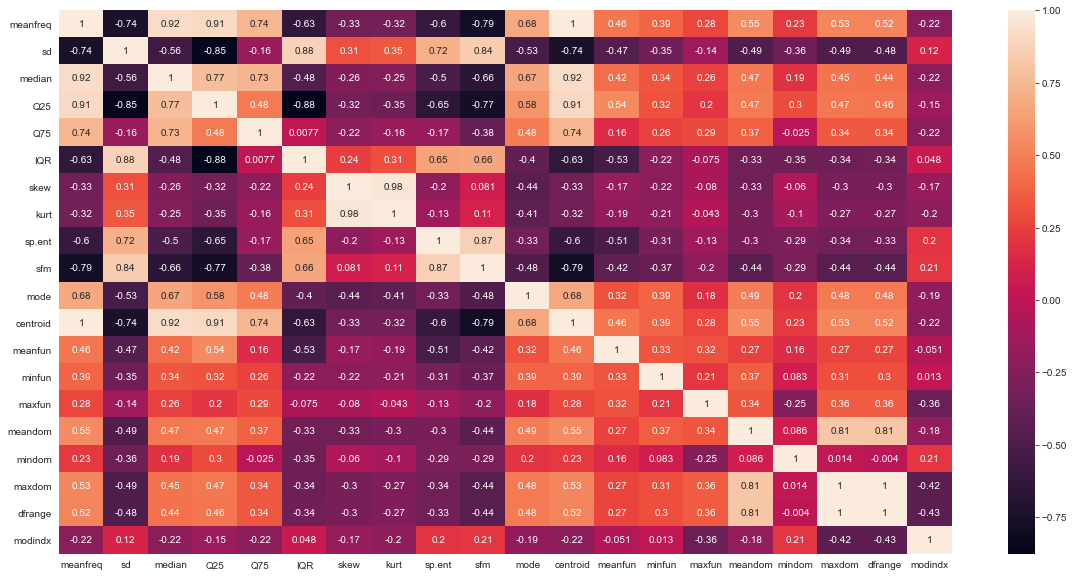

In [5]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,0.181006,0.057098,0.185826,0.140585,0.224818,0.084232,3.142573,36.759299,0.895064,0.407639,0.165055,0.181006,0.142750,0.036869,0.258732,0.830805,0.052838,5.071040,5.018203,0.172914
std,0.029716,0.016647,0.035858,0.048571,0.023445,0.042719,4.255365,135.572688,0.044695,0.176724,0.077143,0.029716,0.032228,0.019433,0.030363,0.528979,0.063486,3.565906,3.565597,0.118765
min,0.048254,0.018363,0.015790,0.000229,0.058268,0.014922,0.141735,2.209673,0.738651,0.036876,0.000000,0.048254,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163876,0.041965,0.170057,0.111227,0.208818,0.042477,1.637159,5.607359,0.862124,0.257165,0.118012,0.163876,0.117158,0.018254,0.253968,0.419355,0.007812,2.007812,1.937500,0.099552
50%,0.185009,0.059079,0.190067,0.140479,0.225677,0.093976,2.183320,8.266441,0.901608,0.395328,0.185960,0.185009,0.140785,0.046921,0.271186,0.768466,0.023438,5.000000,4.968750,0.138806
75%,0.199061,0.066672,0.210306,0.175944,0.243632,0.114153,2.945197,13.708829,0.927736,0.533736,0.220729,0.199061,0.169408,0.047904,0.277457,1.177312,0.070312,7.007812,6.992188,0.209216
max,0.249637,0.114508,0.260541,0.242124,0.268937,0.248770,34.725453,1309.612887,0.981997,0.842936,0.280000,0.249637,0.237636,0.204082,0.279114,2.957682,0.458984,21.843750,21.820312,0.932374


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2535 non-null   float64
 1   sd        2535 non-null   float64
 2   median    2535 non-null   float64
 3   Q25       2535 non-null   float64
 4   Q75       2535 non-null   float64
 5   IQR       2535 non-null   float64
 6   skew      2535 non-null   float64
 7   kurt      2535 non-null   float64
 8   sp.ent    2535 non-null   float64
 9   sfm       2535 non-null   float64
 10  mode      2535 non-null   float64
 11  centroid  2535 non-null   float64
 12  meanfun   2535 non-null   float64
 13  minfun    2535 non-null   float64
 14  maxfun    2535 non-null   float64
 15  meandom   2535 non-null   float64
 16  mindom    2535 non-null   float64
 17  maxdom    2535 non-null   float64
 18  dfrange   2535 non-null   float64
 19  modindx   2535 non-null   float64
 20  label     2535 non-null   obje

In [8]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [9]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 2535
Number of male: 1268
Number of female: 1267


In [10]:
# sns.pairplot(df, hue='label', vars=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
#        'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
#        'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'])

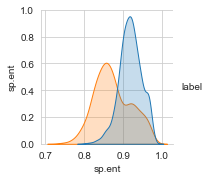

In [16]:
sns.pairplot(df, hue='label', vars=['sp.ent'])

/Users/fengjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

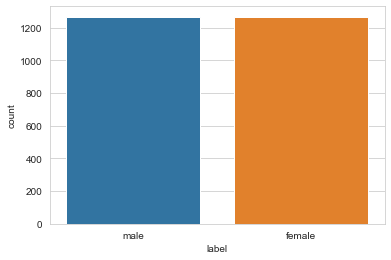

In [17]:
sns.countplot(df['label'], label = "label")

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split

X = df.drop('label', axis=1)
y = df.label

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (2535, 20)
'y' shape: (2535,)


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Support Vector Machines (Kernels)

- 参数C: 在训练数据准确度和软决策界限上获取平衡的参数
- > 数值小：容许一定的误分类
- > 数值大：希望严格分类，给错误分类比较大的惩罚

- 参数gamma: 控制单个训练样本的影响力达到何种程度
- > 数值大: 距离近的数据具有更大的权重
- > 数值小: 更泛化

- 参数degree : 核函数的阶次(多项式)


In [20]:
## Linear Kernel SVM
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.21%
_______________________________________________
CLASSIFICATION REPORT:
               female        male  accuracy    macro avg  weighted avg
precision    0.980106    0.861765  0.912063     0.920935      0.920468
recall       0.839773    0.983221  0.912063     0.911497      0.912063
f1-score     0.904529    0.918495  0.912063     0.911512      0.911567
support    880.000000  894.000000  0.912063  1774.000000   1774.000000
_______________________________________________
Confusion Matrix: 
 [[739 141]
 [ 15 879]]

Test Result:
Accuracy Score: 90.93%
_______________________________________________
CLASSIFICATION REPORT:
               female        male  accuracy   macro avg  weighted avg
precision    0.981818    0.853828   0.90933    0.917823      0.918916
recall       0.837209    0.983957   0.90933    0.910583      0.909330
f1-score     0.903766    0.914286   0.90933    0.909026      0.908936
support    387.000000  374.000000   0.90933  761.000000   

/Users/fengjie/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [24]:
## Polynomial Kernel SVM
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.62%
_______________________________________________
CLASSIFICATION REPORT:
                female         male  accuracy    macro avg  weighted avg
precision     0.985134     0.987242  0.986193     0.986188      0.986195
recall        0.987090     0.985309  0.986193     0.986199      0.986193
f1-score      0.986111     0.986275  0.986193     0.986193      0.986193
support    1007.000000  1021.000000  0.986193  2028.000000   2028.000000
_______________________________________________
Confusion Matrix: 
 [[ 994   13]
 [  15 1006]]

Test Result:
Accuracy Score: 98.03%
_______________________________________________
CLASSIFICATION REPORT:
               female        male  accuracy   macro avg  weighted avg
precision    0.980769    0.979757  0.980276    0.980263      0.980276
recall       0.980769    0.979757  0.980276    0.980263      0.980276
f1-score     0.980769    0.979757  0.980276    0.980263      0.980276
support    260.000000  247.000000  0.980276 

In [25]:
## Radial Kernel SVM
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.06%
_______________________________________________
CLASSIFICATION REPORT:
                female         male  accuracy    macro avg  weighted avg
precision     0.993014     0.988304  0.990631     0.990659      0.990643
recall        0.988083     0.993144  0.990631     0.990614      0.990631
f1-score      0.990543     0.990718  0.990631     0.990630      0.990631
support    1007.000000  1021.000000  0.990631  2028.000000   2028.000000
_______________________________________________
Confusion Matrix: 
 [[ 995   12]
 [   7 1014]]

Test Result:
Accuracy Score: 94.08%
_______________________________________________
CLASSIFICATION REPORT:
               female        male  accuracy   macro avg  weighted avg
precision    0.922794    0.961702  0.940828    0.942248      0.941749
recall       0.965385    0.914980  0.940828    0.940182      0.940828
f1-score     0.943609    0.937759  0.940828    0.940684      0.940759
support    260.000000  247.000000  0.940828 

寻找正确的超参数值的常用方法是使用网格搜索。

通常情况下，先进行很粗的网格搜索，然后围绕找到的最佳值进行更细的网格搜索，速度会更快。

对每个超参数的实际作用有一个良好的认识，可以在超参数空间的正确部分进行搜索。

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


## 数据标准化处理

标准化是指将每个属性的分布转移到平均数为零，标准差为1（单位方差）。对一个模型的属性进行标准化是很有用的。

如果各个特征或多或少看起来不像标准的正态分布数据，它们可能会表现得很糟糕。

In [21]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.980276134122288


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)